<a href="https://colab.research.google.com/github/jang-jinyeol/Machine_Learning/blob/main/knn_fit%26regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn

In [4]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [9]:
!pip install mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import mglearn
import numpy as np

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text

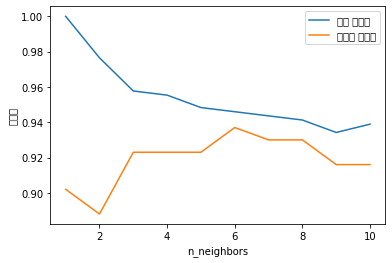

In [ ]:
#이웃의 수가 적을수록 모델이 복잡해지므로 최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽하나 테스트 정확도는 낮음
#정확도가 가장 좋을 때는 중간 정도인 여섯 개를 사용한 경우
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []
#1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()


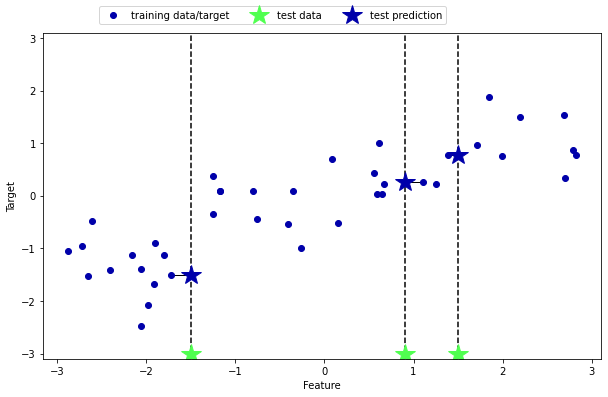

In [ ]:
#k-최근접 이웃 회귀
#wave 데이터셋을 이용
#x축에 세 개의 테스트 데이터 최근접 이웃을 1개만 이요할 때 예측은 그냥 가장 가까운 이웃의 타깃값
mglearn.plots.plot_knn_regression(n_neighbors=1)

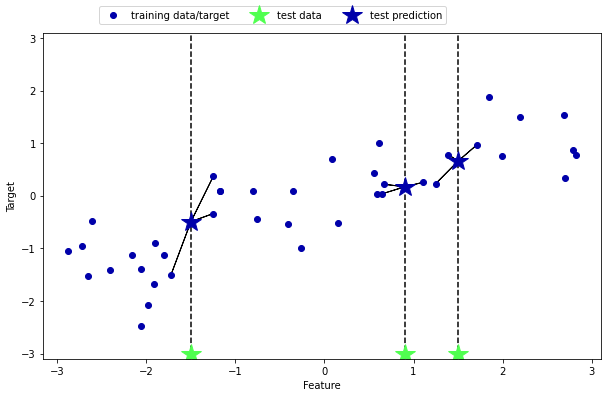

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

# 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만든다.
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킨다.
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print(y_test)
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]
테스트 세트 R^2: 0.83


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


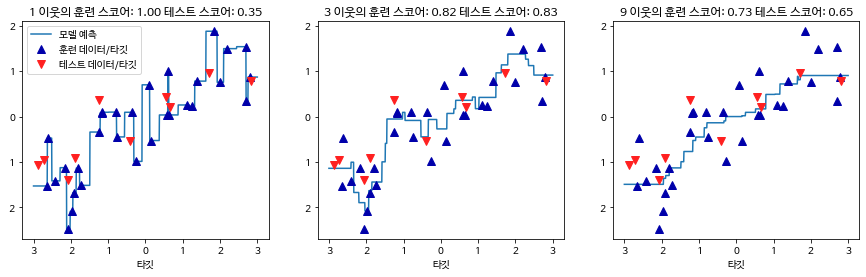

In [12]:
# score 메서드를 사용해 모델을 평가할 수 있다.\
# 이 메서드는 회귀일 땐 R^2 값을 반환 한다.
# 결정 계수라고도 하는 R^2 값은 회귀 모델에서 예측의 적합도를 0과 1 사이의 값으로 계산한 것이다.
# 1은 예측이 완벽한 경우이고, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우이다.
#--------------------------------------------------------#
# KNeighborsRegressor 분석

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1,000개의 데이터 포인트를 만든다.
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line,reg.predict(line))
  ax.plot(X_train, y_train,'^',c=mglearn.cm2.colors[0], markersize=8)
  ax.plot(X_test, y_test,'v',c=mglearn.cm2.colors[1], markersize=8)

  ax.set_title("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
  ax.set_xlabel("특성")
  ax.set_xlabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")



w[0]: 0.393906  b: -0.031804


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


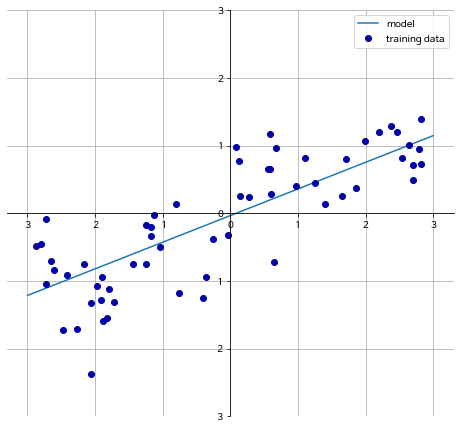

In [13]:
#회귀의 선형 모델

mglearn.plots.plot_linear_regression_wave()

In [23]:
# 선형 회귀(최소제곱법)
# 선형 회귀 또는 최소제곱법(OLS, ordinary least squares)은 가장 간단하고 오래된 회귀용 선형 알고리즘이다.
# 선형 회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차(MSE)를 최소화하는 파라미터 w와 b를 찾는다.
# 평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것
# 선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없다.
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

# 기울기 파라미터(w)는 가중치(weight) 또는 계수(coefficient)라고 하며 lr 객체의 coef_ 속성에 저장되어 있고 편향(offset) 또는 절편(intercept) 파라미터 (b)는 intercept_ 속성에 저장되어 있다.
# intercept_ 속성은 항상 실수(float)값 하나지만, coef_ 속성은 각 입력 특성에 하나씪 대응되는 Numpy 배열이다.
# wave 데이터셋에는 입력 특성이 하나뿐이므로 lr.coef_도 원소를 하나만 가지고 있다.

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

# 훈련 세트와 테스트 세트의 성능 확인
print('\n')
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# R^2 값이 훈련 세트와 테스트 세트의 점수가 매우 비슷하다. 이는 과소적합을 의미한다.


lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


훈련 세트 점수: 0.67
테스트 세트 점수: 0.66
